In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='talk', style='ticks')

%matplotlib inline

In [2]:
!ls -lh diamonds.csv

-rw-r--r-- 1 jovyan users 2.8M Mar  9 21:55 diamonds.csv


In [3]:
df = pd.read_csv('diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

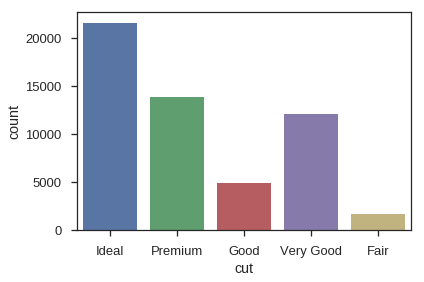

In [6]:
sns.countplot(x='cut', data=df)

In [7]:
df.groupby('cut').mean().price

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

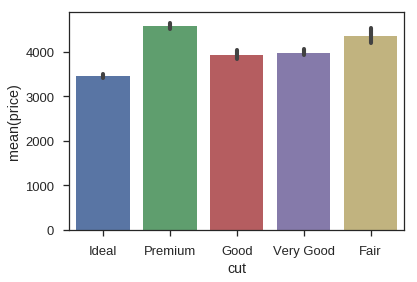

In [8]:
sns.barplot(x='cut', y='price', data=df)

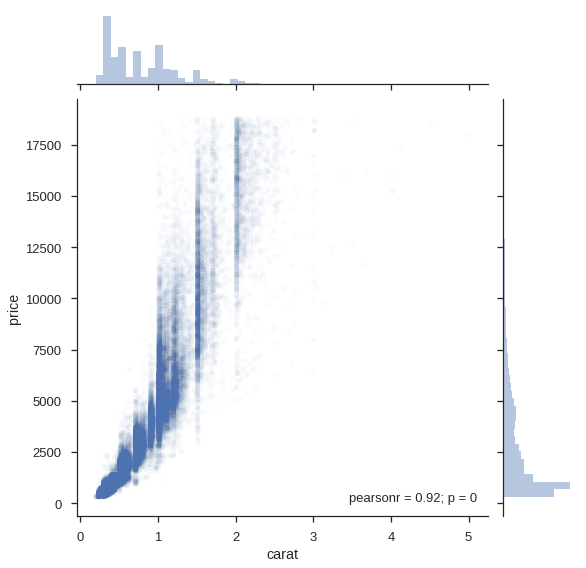

In [9]:
sns.jointplot(x='carat', y='price', data=df, size=8, alpha=.02, marker='.')

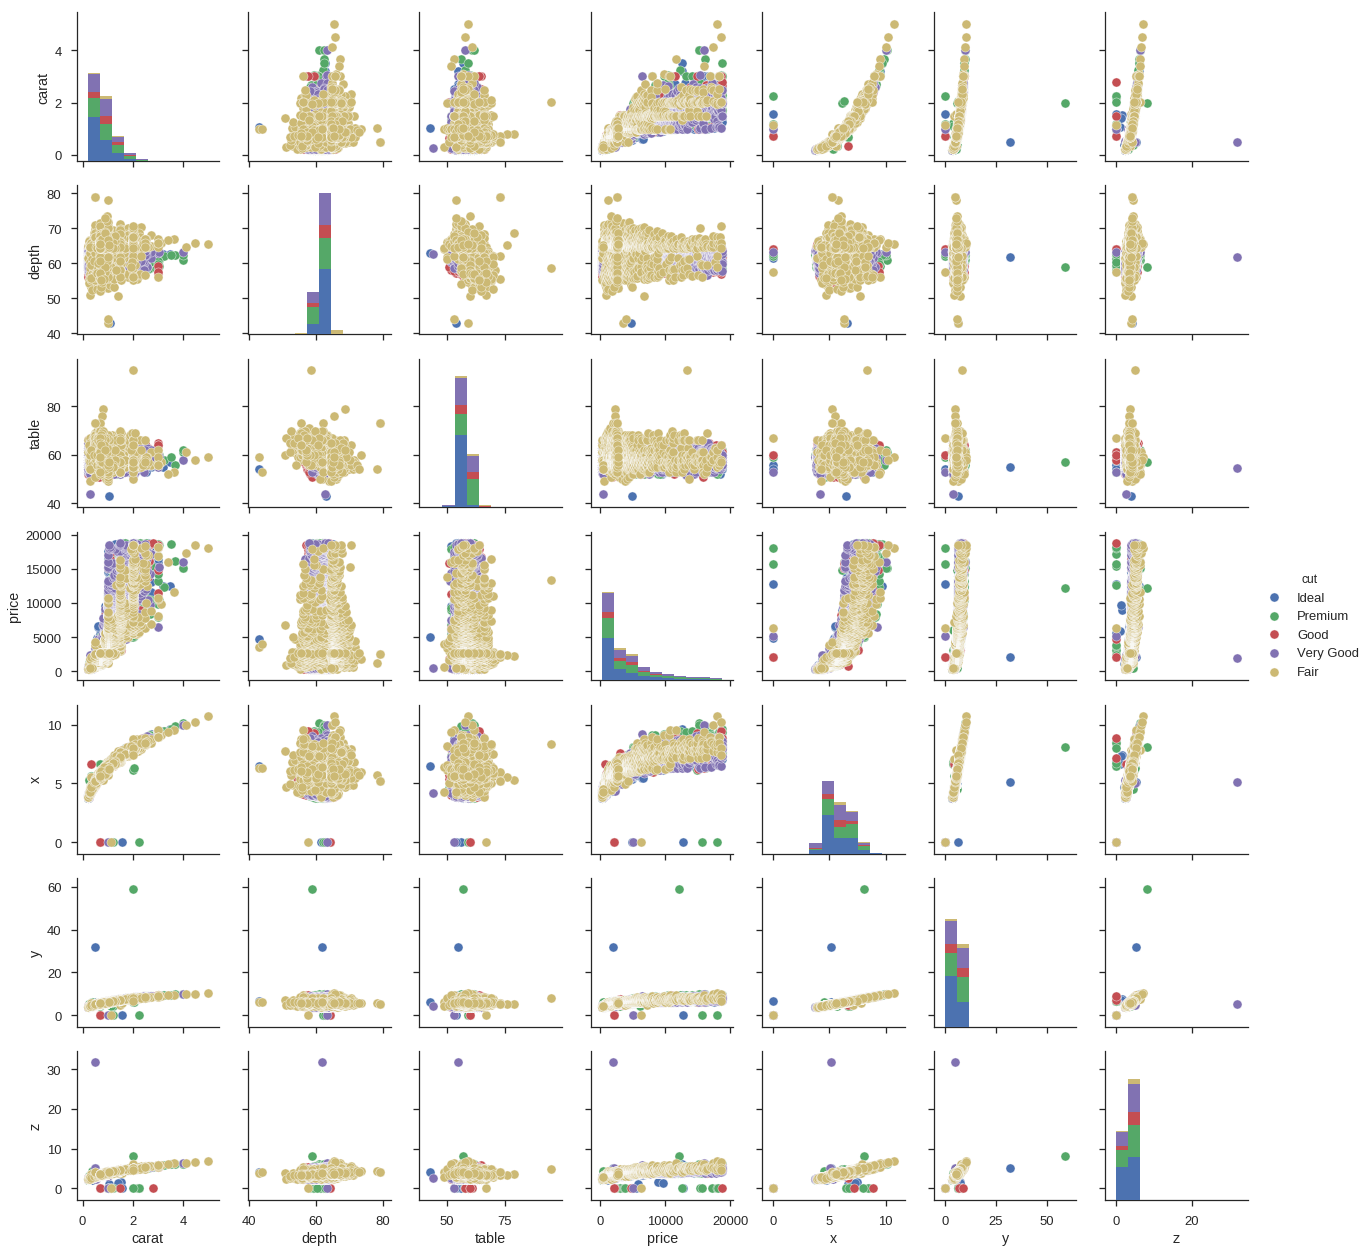

In [10]:
g = sns.pairplot(df, hue='cut')

In [11]:
def core(df, α=.05):
    mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
    return df[mask]

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


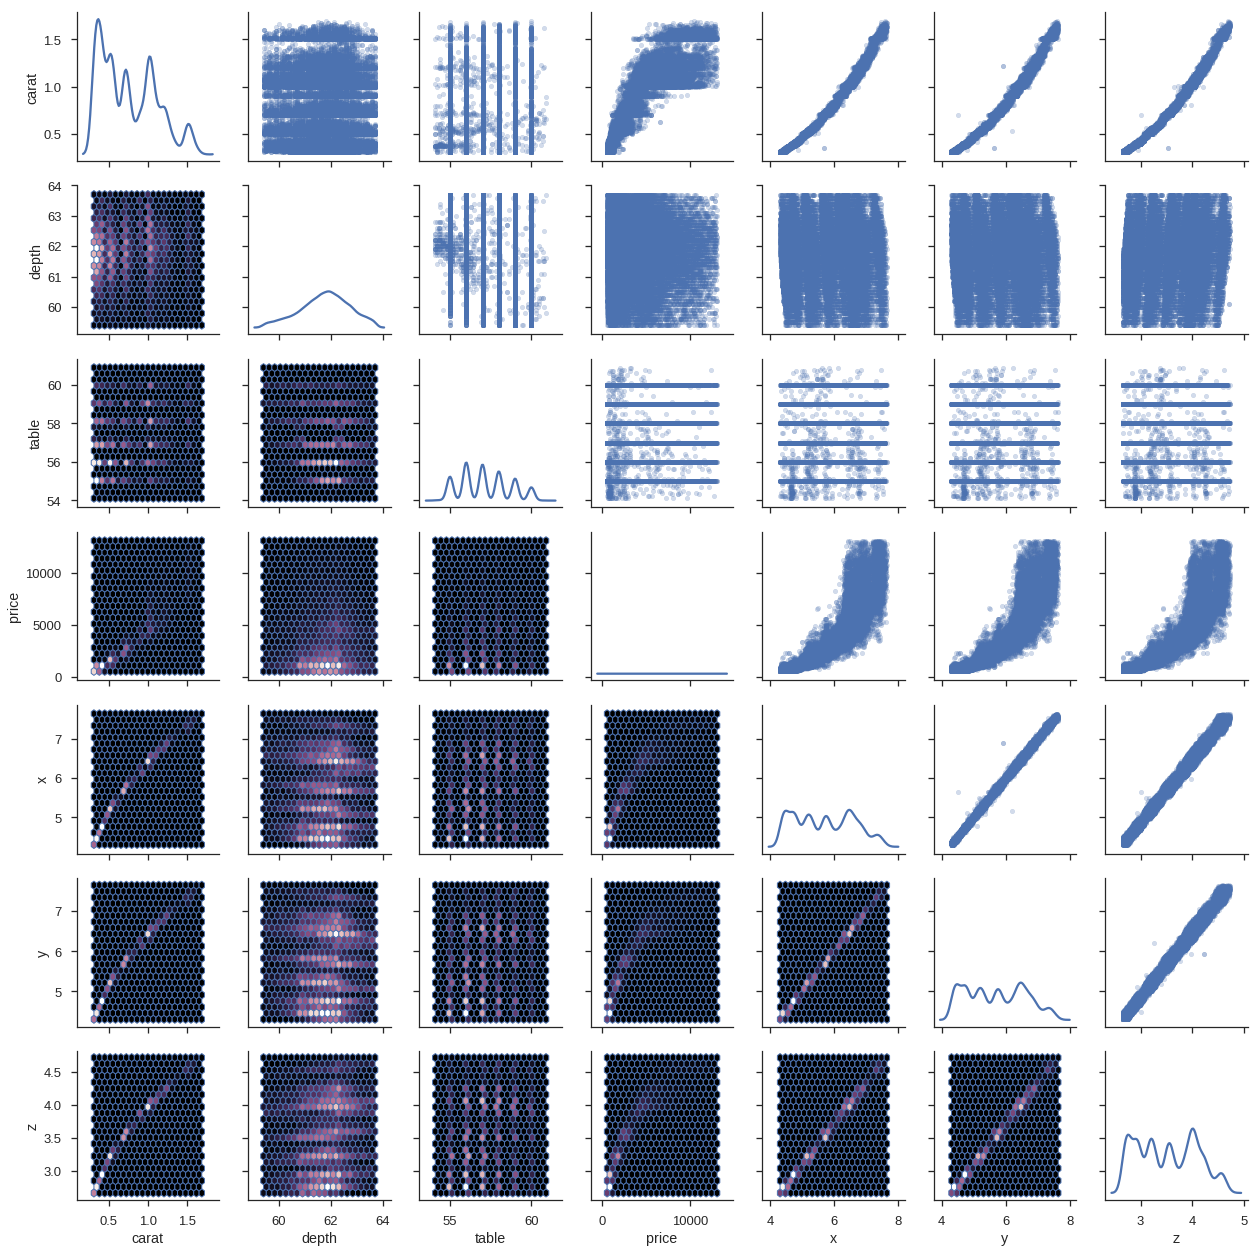

In [12]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

(df.select_dtypes(include=[np.number])
   .pipe(core)
   .pipe(sns.PairGrid)
   .map_upper(plt.scatter, marker='.', alpha=.25)
   .map_diag(sns.kdeplot)
   .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
);

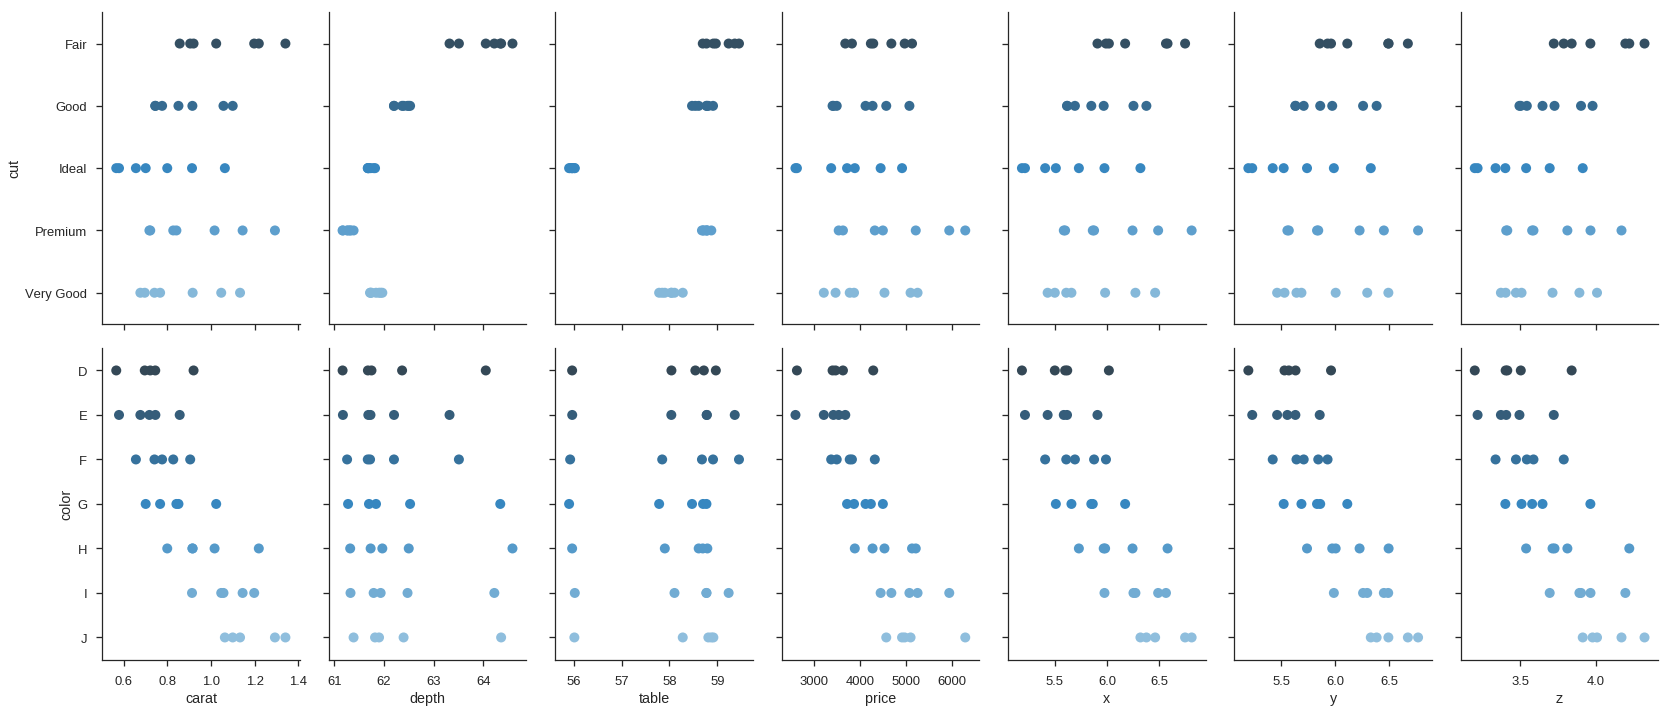

In [13]:
agged = df.groupby(['cut', 'color']).mean().sort_index().reset_index()

g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['cut', 'color'],
                 size=5, aspect=.65)
g.map(sns.stripplot, orient="h", size=10, palette='Blues_d');

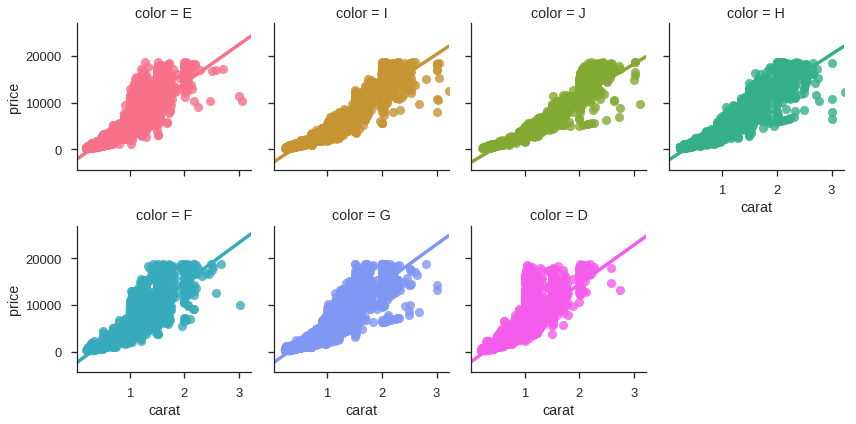

In [14]:
g = sns.FacetGrid(df, col='color', hue='color', col_wrap=4)
g.map(sns.regplot, 'carat', 'price');